<a href="https://colab.research.google.com/github/qjmiller/portfolio/blob/main/python_project_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


**Import Dataset:**

In [ ]:
# Load the dataset and ensure proper data types
df = pd.read_csv('hmd_python.csv')

# Convert TransactionDate and DeliveryDate to datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['DeliveryDate'] = pd.to_datetime(df['DeliveryDate'])

# Display the first few rows to confirm successful load
df.head()


,Invoice,TransactionDate,DeliveryDate,EmpKey,ChannelKey,StoreID,ProductKey,CustomerKey,Qty,Cost,Price,ProductDescription,Brand,Type,Color,CityName,CountryName,Channel,CustomerName,Industry
0,E1072592,2002-01-01,2002-01-22,E04,9,IN288,FL-125,72,1,1472,1958,ForkLifts-Bradshaw-HeavyDuty-YellowBlack,Bradshaw,HeavyDuty,YellowBlack,Mumbai,India,Brochure,Skanska,Construction
1,E1072593,2002-01-01,2002-01-16,E12,9,BZ118,RP-243,47,1,6618,9265,RoadPavers-Raygo-LightDuty-WhiteYellow,Raygo,LightDuty,WhiteYellow,SaoPaulo,Brazil,Brochure,LGCorp,Conglomerate
2,E1072594,2002-01-01,2002-01-21,E02,3,NM120,RD-516,48,2,10672,12593,RockDrillers-Tranter-LightDuty-White,Tranter,LightDuty,White,Windhoek,Namibia,Magazine,Lukoil,Oil&Gas
3,E1072595,2002-01-01,2002-01-31,E07,4,US213,BZ-801,73,1,3013,4007,Bulldozers-JCB-HeavyDuty-Yellow,JCB,HeavyDuty,Yellow,Nashville,US,CustomerReview,State Grid of China,Electricity
4,E1072596,2002-01-01,2002-01-21,E03,3,US219,BZ-812,16,1,7396,9171,Bulldozers-Case-HeavyDuty-White,Case,HeavyDuty,White,Detroit,US,Magazine,Cargill,FoodProcessing


# **Analysis Sections and Questions**

**Brands with the highest volume of products sold:**

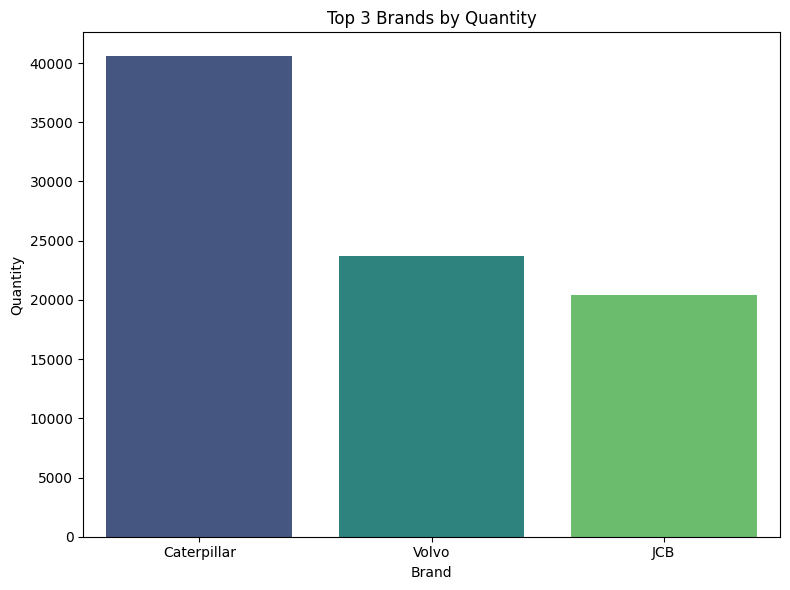

In [ ]:
# Plot the top 3 brands
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=top_3_brands.index, y=top_3_brands.values, palette='viridis')
plt.title('Top 3 Brands by Quantity')
plt.xlabel('Brand')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()


**Monthly Sales Trends (2002-2012):**

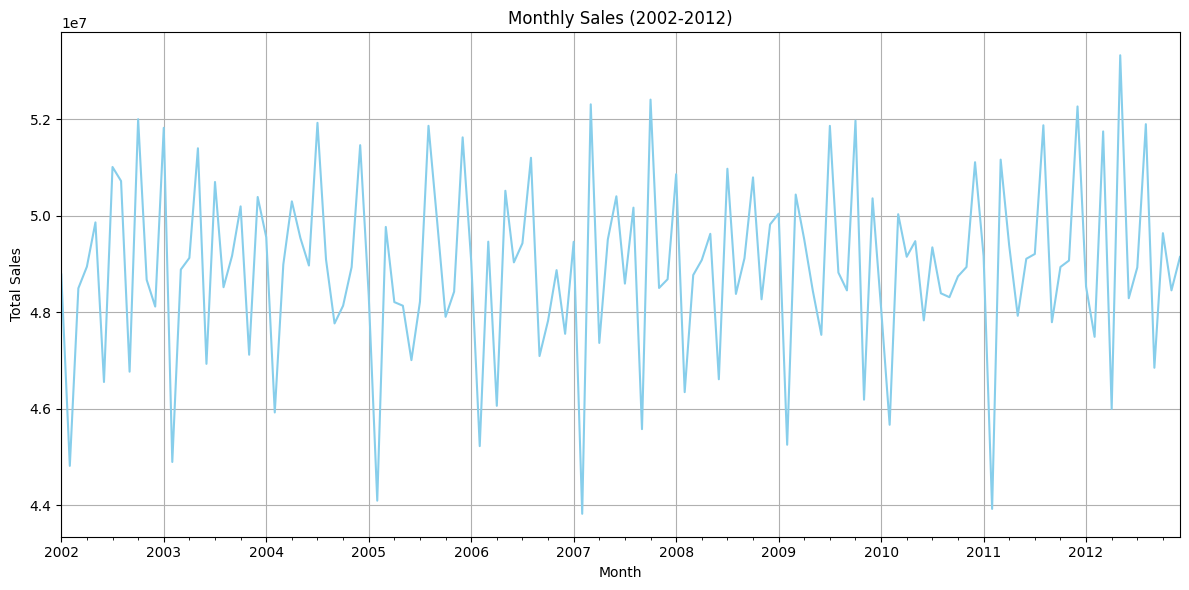

In [ ]:
# Filter data until 2012
df = df[df['TransactionDate'] <= '2012-12-31']

# Set TransactionDate as index
df.set_index('TransactionDate', inplace=True)

# Resample data to calculate monthly sales
monthly_sales = df['Price'].resample('ME').sum()  # Use 'ME' for monthly end

# Plot monthly sales trend
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', color='skyblue')
plt.title('Monthly Sales (2002-2012)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.tight_layout()
plt.show()


**Most Effective Marketing Channels:**

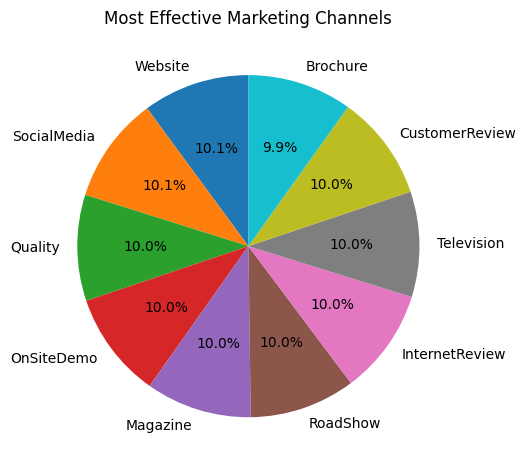

In [ ]:
# Calculate total sales by channel
df['Sales'] = df['Price'] * df['Qty']
channel_grouped = df[df['Sales'] > 0].groupby('Channel')['Sales'].sum()

# Sort by sales and get top 10 channels
channel_sorted = channel_grouped.sort_values(ascending=False)
top_10_channels = channel_sorted.head(10)

# Plot the pie chart for marketing channels
plt.pie(top_10_channels, labels=top_10_channels.index, autopct='%1.1f%%', startangle=90)
plt.title('Most Effective Marketing Channels')
plt.tight_layout()
plt.show()


**Regions Driving the Most Sales:**

In [ ]:
# Group by country and city, and calculate total sales
region_sorted = df.groupby(['CountryName', 'CityName'])['Price'].sum().sort_values(ascending=False)

# Get the top 10 regions
top_10_regions = region_sorted.head(10)
print(top_10_regions)

# Create a geographic heatmap of sales by region
data = {
    'CountryName': ['Australia', 'Rwanda', 'Tunisia', 'India', 'China', 'Norway', 'UAE', 'Namibia', 'SouthAfrica', 'NewZealand'],
    'CityName': ['Melbourne', 'Kigali', 'Tunis', 'Kolkata', 'Taipei', 'Drammen', 'Fujairah', 'Windhoek', 'Capetown', 'Christchurch'],
    'Latitude': [-37.8136, -1.9706, 36.8065, 22.5726, 25.0330, 59.7400, 25.1118, -22.5597, -33.9249, -43.5321],
    'Longitude': [144.9631, 30.1044, 10.1647, 88.3639, 121.5654, 10.2045, 56.3269, 17.0836, 18.4232, 172.6362],
    'Sales': [79609705, 79509927, 79438303, 79181877, 79054103, 79020577, 78960368, 78878227, 78830606, 78809606]
}

# Create a DataFrame for geographic data
df_regions = pd.DataFrame(data)

# Plotting the heatmap using Plotly
fig = px.scatter_mapbox(df_regions, lat='Latitude', lon='Longitude', size='Sales',
                        color='Sales', color_continuous_scale='Cividis', size_max=15,
                        title='Heatmap of Sales by Region', hover_name='CountryName', hover_data=['CityName', 'Sales'])

fig.update_layout(mapbox_style="carto-positron", mapbox_zoom=1.5, mapbox_center={"lat": 20, "lon": 20})
fig.show()


CountryName  CityName    
Australia    Melbourne       79609705
Rwanda       Kigali          79509927
Tunisia      Tunis           79438303
India        Kolkata         79181877
China        Taipei          79054103
Norway       Drammen         79020577
UAE          Fujairah        78960368
Namibia      Windhoek        78878227
SouthAfrica  Capetown        78830606
NewZealand   Christchurch    78809606
Name: Price, dtype: int64


**Most Popular Products:**

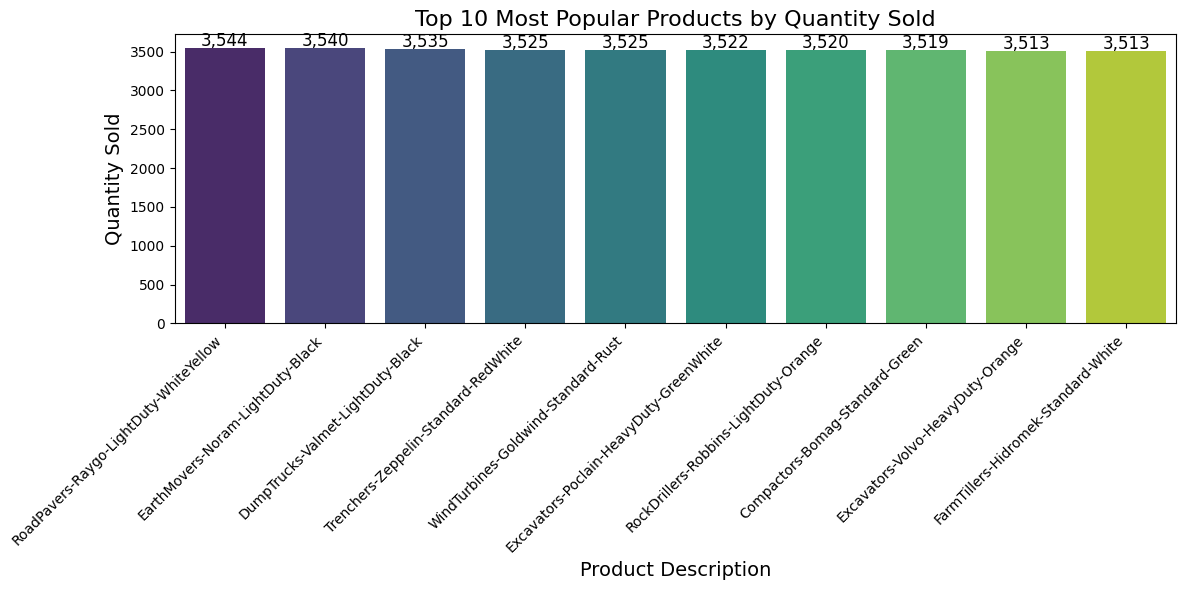

In [ ]:
# Group by ProductKey and sum the quantity sold
product_sales = df.groupby('ProductKey')['Qty'].sum().reset_index()

# Sort by quantity sold in descending order
product_sales_sorted = product_sales.sort_values(by='Qty', ascending=False)

# Get the top 10 most popular products
top_products = product_sales_sorted.head(10)

# Merge ProductKey with ProductDescription
top_products_with_description = top_products.merge(df[['ProductKey', 'ProductDescription']].drop_duplicates(), on='ProductKey', how='left')

# Visualization with Seaborn (Bar Chart)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_products_with_description, x='ProductDescription', y='Qty', palette='viridis')
plt.title('Top 10 Most Popular Products by Quantity Sold', fontsize=16)
plt.xlabel('Product Description', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


#**Product Analysis**

**Products Most Likely to Be Repurchased:**

/tmp/ipython-input-21-1736037313.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




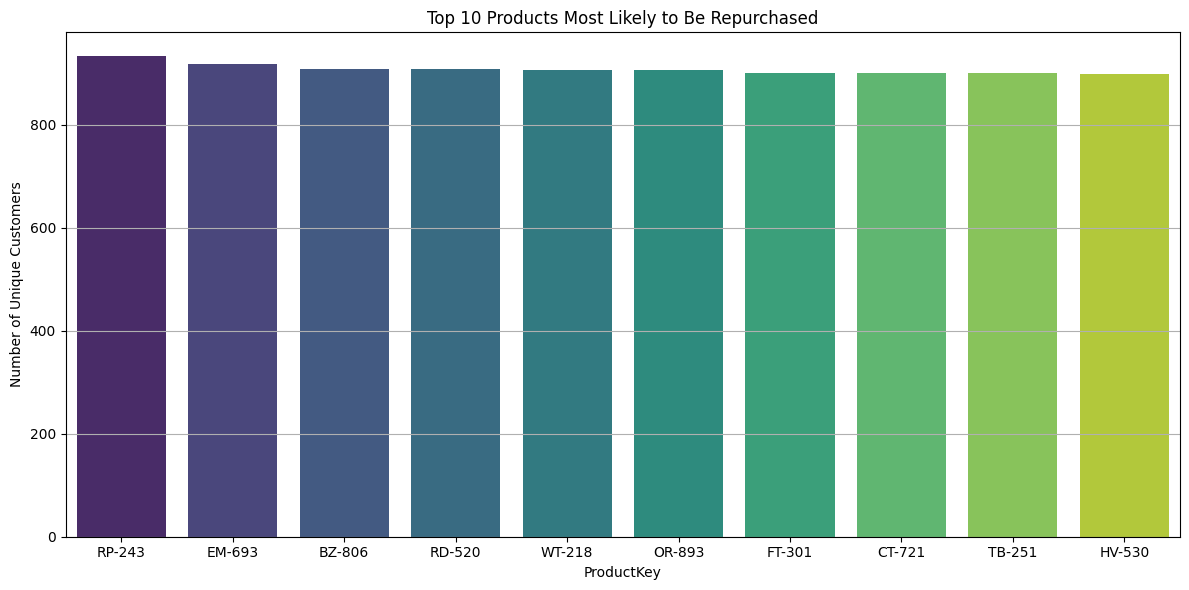

In [ ]:
# Sort by CustomerKey and TransactionDate
df.sort_values(by=['CustomerKey', 'TransactionDate'], inplace=True)

# Group by ProductKey and CustomerKey to count purchases
purchase_counts = df.groupby(['ProductKey', 'CustomerKey']).size().reset_index(name='PurchaseCount')

# Filter to find purchases > 1 (indicating repurchase)
repeat_purchases = purchase_counts[purchase_counts['PurchaseCount'] > 1]

# Count unique customers who repurchased each product
repurchase_summary = repeat_purchases.groupby('ProductKey').agg(TotalRepurchases=('PurchaseCount', 'sum'), UniqueCustomers=('CustomerKey', 'nunique')).reset_index()

# Sort by number of unique customers for repurchases
repurchase_summary.sort_values(by='UniqueCustomers', ascending=False, inplace=True)

# Plot a visual using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=repurchase_summary.head(10), x='ProductKey', y='UniqueCustomers', palette='viridis')
plt.title('Top 10 Products Most Likely to Be Repurchased')
plt.xlabel('ProductKey')
plt.ylabel('Number of Unique Customers')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#**Geographical Analysis**

**Customer Demographics by Region:**

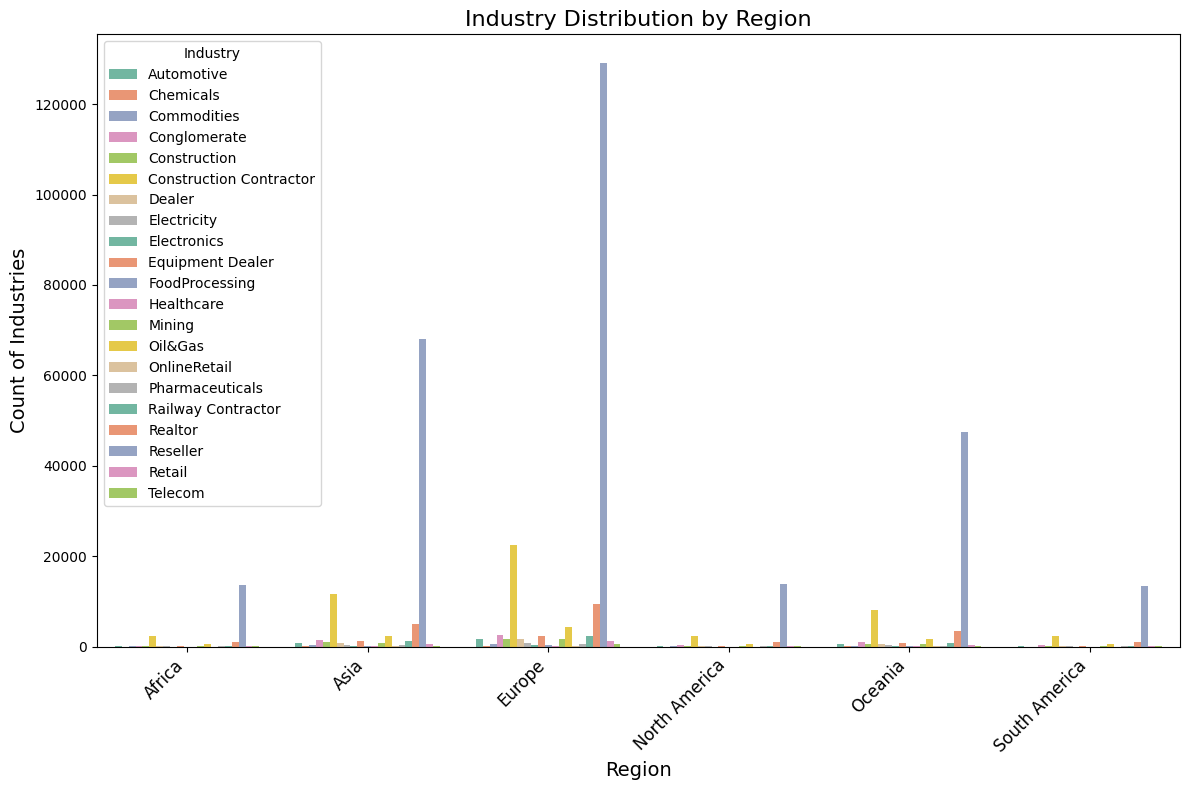

In [ ]:
# Mapping countries to regions
country_to_region = {
    'USA': 'North America', 'Canada': 'North America', 'Germany': 'Europe', 'France': 'Europe',
    'India': 'Asia', 'China': 'Asia', 'Brazil': 'South America', 'Australia': 'Oceania',
    'South Africa': 'Africa', 'Japan': 'Asia', 'UK': 'Europe', 'Mexico': 'North America',
    'Argentina': 'South America', 'Russia': 'Europe', 'Egypt': 'Africa', 'Nigeria': 'Africa',
    'Italy': 'Europe', 'South Korea': 'Asia', 'Spain': 'Europe', 'Netherlands': 'Europe',
}

df['Region'] = df['CountryName'].map(country_to_region)

# Group by region and industry, then count occurrences
demographics_by_region = df.groupby(['Region', 'Industry']).size().reset_index(name='Count')

# Create a bar plot grouped by region
plt.figure(figsize=(12, 8))
sns.barplot(data=demographics_by_region, x='Region', y='Count', hue='Industry', palette='Set2')
plt.title('Industry Distribution by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Count of Industries', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


# **Customer Analysis**

**Products Most Interested by High-Value Customers:**

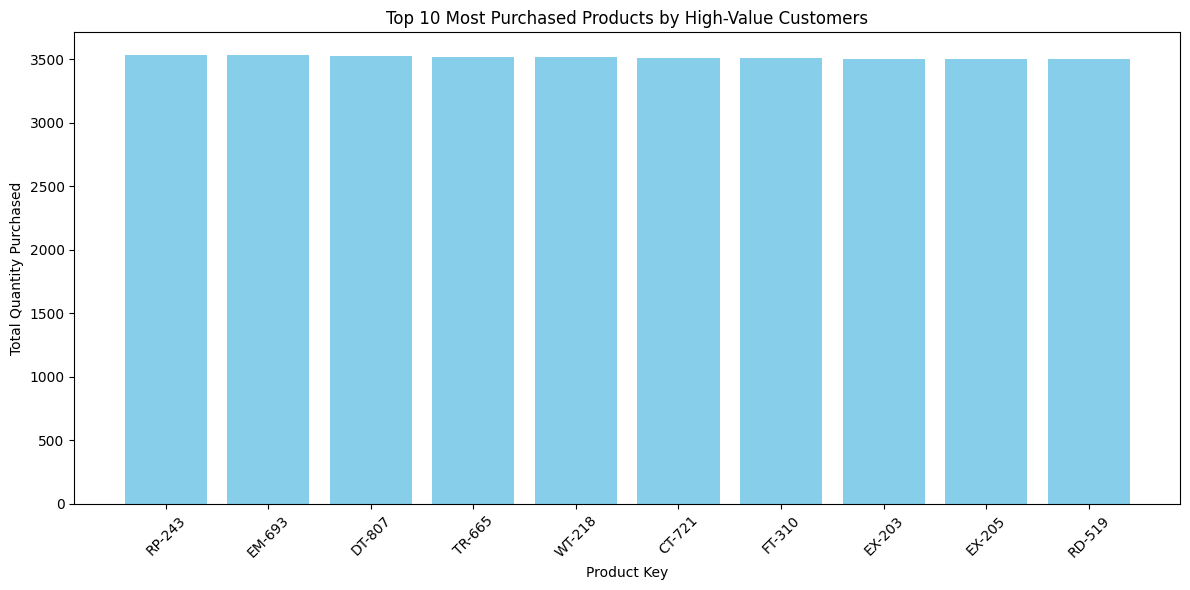

In [ ]:
# Filter high-value customers (Total quantity > 10)
high_value_customers = df.groupby('CustomerKey').filter(lambda x: x['Qty'].sum() > 10)

# Group by ProductKey and sum the quantity sold
product_freq = high_value_customers.groupby('ProductKey')['Qty'].sum().reset_index()

# Sort by quantity sold in descending order
popular_products = product_freq.sort_values(by='Qty', ascending=False)

# Plot the top 10 most purchased products by high-value customers
plt.figure(figsize=(12, 6))
plt.bar(popular_products['ProductKey'].astype(str).head(10), popular_products['Qty'].head(10), color='skyblue')
plt.title('Top 10 Most Purchased Products by High-Value Customers')
plt.xlabel('Product Key')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Purchase Frequency by Average Spending per Customer:**

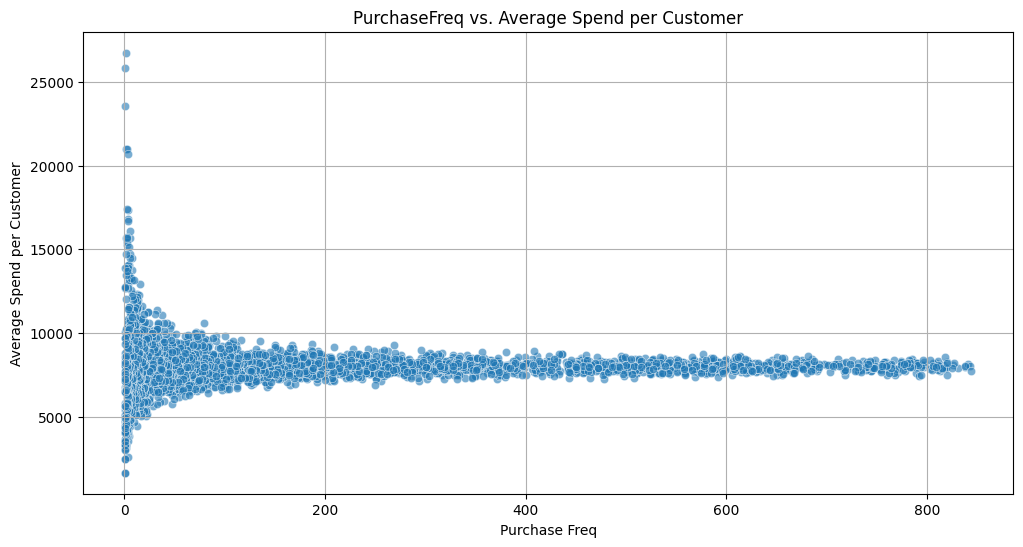

In [ ]:
df.reset_index(inplace=True)
# Analyze repeat purchase frequency and total spend
customer_summary = df.groupby('CustomerKey').agg(TotalSpend=('Price', 'sum'), PurchaseFreq=('TransactionDate', 'count')).reset_index()

# Calculate average spend per purchase
customer_summary['AverageSpend'] = customer_summary['TotalSpend'] / customer_summary['PurchaseFreq']

# Visualize the purchase of freq and average spend
plt.figure(figsize=(12,6))
sns.scatterplot(data=customer_summary, x='PurchaseFreq', y='AverageSpend', alpha=0.6)
plt.title('PurchaseFreq vs. Average Spend per Customer')
plt.xlabel('Purchase Freq')
plt.ylabel('Average Spend per Customer')
plt.grid()
plt.show()